In [1]:
%cd ..

/Users/pavanpreetgandhi/git-repos/interpretable-sla


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from source.fit_predict_score_utils import fit_and_predict

In [3]:
sns.set_theme(context='paper', style='whitegrid', font_scale=1.2, palette='muted')

In [4]:
df = pd.read_parquet("datasets/3_rubric_based_questions.parquet")
features = df.columns[5:]
target = df.columns[3] # part_score
df[features] = np.exp(df[features])  # convert logprobs to probabilities

In [5]:
new_features = features.str[0:2] + "_" + features.str[-1]
df = df.rename(columns=dict(zip(features, new_features)))
features = new_features
print(list(features))

['dm_A', 'dm_B', 'dm_C', 'dm_D', 'dm_E', 'dm_F', 'pf_A', 'pf_B', 'pf_C', 'pf_D', 'pf_E', 'pf_F', 'lr_A', 'lr_B', 'lr_C', 'lr_D', 'lr_E', 'lr_F']


In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [7]:
predictions, pipelines = fit_and_predict(df=df, features=features, pipeline=pipeline)
df['overall_pred'] = predictions

question_feature_groups = {
    'pf': [f for f in features if f.startswith('pf')],
    'lr': [f for f in features if f.startswith('lr')],
    'dm': [f for f in features if f.startswith('dm')],
}
for question, question_features in question_feature_groups.items():
    df_question = df.drop([f for f in features if f not in question_features], axis=1)
    predictions, pipelines = fit_and_predict(df=df_question, features=question_features, pipeline=pipeline)

    # # Display the parameters of the model for part 3
    # part = 3
    # weights = pd.Series(pipelines[part].named_steps['regressor'].coef_, index=question_features)
    # weights.loc['intercept'] = pipelines[part].named_steps['regressor'].intercept_
    # print(f"Weights for question {question} (part {part}):")
    # print(weights)
    # print()

    df[f'{question}_pred'] = predictions

display(df)

,speaker_id,subset,part,part_score,overall_score,dm_A,dm_B,dm_C,dm_D,dm_E,...,lr_A,lr_B,lr_C,lr_D,lr_E,lr_F,overall_pred,pf_pred,lr_pred,dm_pred
file_id,,,,,,,,,,,,,,,,,,,,,
SI114J-00001-P40018,SI114J-00001,train,4,3.0,NaN,0.108511,0.486313,0.260305,0.051257,0.074578,...,0.103574,0.219265,0.409641,0.124934,0.097298,0.031588,3.658837,3.963342,3.989108,3.609400
SI114J-00002-P10003,SI114J-00002,train,1,4.5,NaN,0.104764,0.602876,0.221786,0.018205,0.043672,...,0.107427,0.257703,0.481453,0.073833,0.050745,0.015476,4.008666,3.986183,4.006905,4.037872
SI114J-00002-P10004,SI114J-00002,train,1,4.5,NaN,0.134158,0.564824,0.207787,0.029935,0.052537,...,0.086018,0.248901,0.410368,0.125155,0.097471,0.024645,3.973140,4.116838,3.928660,3.852654
SI114J-00002-P10005,SI114J-00002,train,1,4.5,NaN,0.090156,0.754869,0.131177,0.007400,0.010115,...,0.085001,0.357870,0.459514,0.054881,0.025924,0.005434,4.241479,4.355667,4.250862,4.253614
SI114J-00002-P10006,SI114J-00002,train,1,4.5,NaN,0.067618,0.602674,0.284683,0.018199,0.021952,...,0.044111,0.306194,0.572045,0.046956,0.019574,0.002820,4.410054,4.513563,4.305476,4.179378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SI137O-01032-P50019,SI137O-01032,eval,5,3.5,3.25,0.123651,0.589907,0.217015,0.024348,0.033280,...,0.085072,0.358166,0.432030,0.066254,0.033315,0.005109,4.046560,4.130741,4.296149,3.998460
SI137O-01032-P50020,SI137O-01032,eval,5,3.5,3.25,0.124067,0.591889,0.204551,0.027683,0.042876,...,0.094269,0.256249,0.422483,0.121044,0.073417,0.022391,3.861523,4.113099,3.985919,3.901645
SI137O-01032-P50021,SI137O-01032,eval,5,3.5,3.25,0.109730,0.557255,0.232299,0.037922,0.051833,...,0.083042,0.289845,0.396171,0.113505,0.083042,0.019724,4.046704,4.059432,4.111580,3.936673


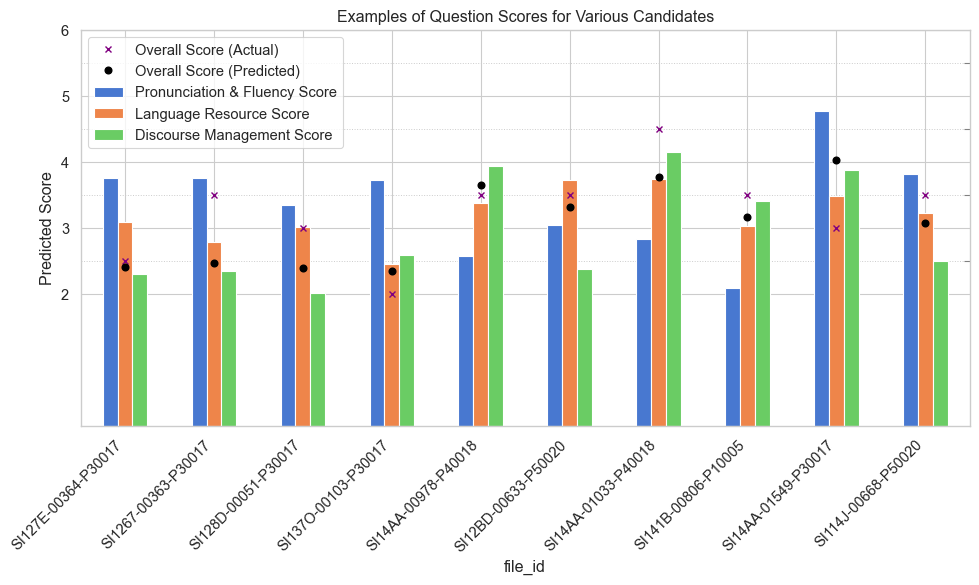

In [10]:
dim_pred_cols = ['pf_pred', 'lr_pred', 'dm_pred']
overall_pred_col = 'overall_pred'
overall_actual = 'part_score'
selection = df[dim_pred_cols].var(axis=1).sort_values(ascending=False).iloc[20:30].index # Select examples with high variance to illustrate differences

ax = df.loc[selection][dim_pred_cols].plot(kind='bar', figsize=(10, 6), legend=False)
df.loc[selection][overall_actual].plot(ax=ax, color='purple', marker='x', linestyle='None')
df.loc[selection][overall_pred_col].plot(ax=ax, color='black', marker='o', linestyle='None')
ax.legend(['Overall Score (Actual)', 'Overall Score (Predicted)', 'Pronunciation & Fluency Score', 'Language Resource Score', 'Discourse Management Score'], loc='upper left')
plt.ylabel('Predicted Score')
plt.title('Examples of Question Scores for Various Candidates')
plt.xticks(rotation=45, ha='right')
ax.set_ylim(0, 6)
ax.set_yticks(np.arange(2, 7, 1))
ax.set_yticks(np.arange(2, 6.5, 0.5), minor=True)
ax.tick_params(axis='y', which='minor', length=4, color='gray', direction='in', right=True)
ax.grid(True, which='minor', axis='y', linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.savefig('report/images/question_score_examples.png', dpi=600, bbox_inches='tight')
plt.show()